In [ ]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python mediapipe sklearn matplotlib

In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

ModuleNotFoundError: No module named 'cv2'

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION) # Draw face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS) # Draw pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS) # Draw right hand connections

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp_holistic.FACEMESH_TESSELATION, 
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
                             ) 
    # Draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
                             ) 
    # Draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
                             ) 
    # Draw right hand connections  
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS, 
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
                             ) 

In [6]:
cap = cv2.VideoCapture(1)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

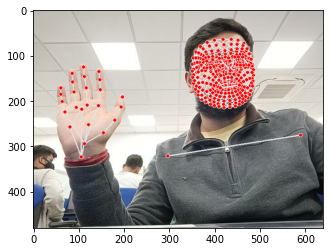

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [9]:
len(results.right_hand_landmarks.landmark)

21

In [10]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [11]:
# Path for exported data, numpy arrays
# Step 4
DATA_PATH = os.path.join('MP_Data2')
actions = np.array(['hello', 'thanks', 'ok'])

# no of videos
no_sequences = 30

# no of frames in each video
sequence_length = 30

In [12]:
for action in actions:
    for sequence in range(no_sequences):
        try:
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [ ]:
#  STEP 5: Collect data
cap = cv2.VideoCapture(1)
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    for action in actions:
        for sequence in range(no_sequences):
            for frame_num in range(sequence_length):
                ret, frame = cap.read()

                image, results = mediapipe_detection(frame, holistic)
                #print(results)
                draw_styled_landmarks(image, results)

                if frame_num == 0:
                    cv2.putText(image, 'STARTING COLLECTION', (120, 200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 4, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else:
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15, 12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 4, cv2.LINE_AA)
                    cv2.imshow('OpenCV Feed', image)
                
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)
                
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
    cap.release()
    cv2.destroyAllWindows()

In [13]:
# Step 6 - preprocess data create labels and features
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [14]:
label_map = {label:num for num, label in enumerate(actions)}
label_map

{'hello': 0, 'thanks': 1, 'ok': 2}

In [15]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [16]:
X = np.array(sequences)

In [17]:
y = to_categorical(labels).astype(int)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [19]:
X_train.max

<function ndarray.max>

In [20]:
# Step 7 - build and train lSTM NN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [21]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [22]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30, 1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [23]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [24]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
3/3 [==============================] - 3s 100ms/step - loss: 1.1211 - categorical_accuracy: 0.3611
Epoch 2/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.1035 - categorical_accuracy: 0.2778
Epoch 3/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0965 - categorical_accuracy: 0.4028
Epoch 4/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0963 - categorical_accuracy: 0.3472
Epoch 5/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0955 - categorical_accuracy: 0.3472
Epoch 6/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.1003 - categorical_accuracy: 0.3472
Epoch 7/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0911 - categorical_accuracy: 0.3472
Epoch 8/2000
3/3 [==============================] - 0s 82ms/step - loss: 1.0955 - categorical_accuracy: 0.4167
Epoch 9/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0964 - categorical_accuracy: 0.347

3/3 [==============================] - 0s 110ms/step - loss: 1.0816 - categorical_accuracy: 0.3611
Epoch 75/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0815 - categorical_accuracy: 0.3611
Epoch 76/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0814 - categorical_accuracy: 0.3611
Epoch 77/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0813 - categorical_accuracy: 0.3611
Epoch 78/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0812 - categorical_accuracy: 0.3611
Epoch 79/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0812 - categorical_accuracy: 0.3611
Epoch 80/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0811 - categorical_accuracy: 0.3611
Epoch 81/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0810 - categorical_accuracy: 0.3611
Epoch 82/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0810 - categorical_accuracy: 0.3611
Epo

3/3 [==============================] - 0s 90ms/step - loss: 1.0831 - categorical_accuracy: 0.3472
Epoch 147/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0828 - categorical_accuracy: 0.3472
Epoch 148/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0824 - categorical_accuracy: 0.3472
Epoch 149/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0819 - categorical_accuracy: 0.3472
Epoch 150/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0815 - categorical_accuracy: 0.3472
Epoch 151/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0815 - categorical_accuracy: 0.3611
Epoch 152/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0811 - categorical_accuracy: 0.3611
Epoch 153/2000
3/3 [==============================] - 0s 83ms/step - loss: 1.0798 - categorical_accuracy: 0.3611
Epoch 154/2000
3/3 [==============================] - 0s 86ms/step - loss: 1.0781 - categorical_accuracy: 0.361

3/3 [==============================] - 0s 96ms/step - loss: 1.0729 - categorical_accuracy: 0.3611
Epoch 219/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0725 - categorical_accuracy: 0.3611
Epoch 220/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0718 - categorical_accuracy: 0.3611
Epoch 221/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0714 - categorical_accuracy: 0.3611
Epoch 222/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0706 - categorical_accuracy: 0.3611
Epoch 223/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0702 - categorical_accuracy: 0.3611
Epoch 224/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0694 - categorical_accuracy: 0.3611
Epoch 225/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0691 - categorical_accuracy: 0.3611
Epoch 226/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0685 - categorical_accuracy: 0.361

3/3 [==============================] - 0s 93ms/step - loss: 1.0673 - categorical_accuracy: 0.3611
Epoch 291/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0673 - categorical_accuracy: 0.3611
Epoch 292/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0673 - categorical_accuracy: 0.3750
Epoch 293/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0674 - categorical_accuracy: 0.3611
Epoch 294/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0673 - categorical_accuracy: 0.3611
Epoch 295/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0673 - categorical_accuracy: 0.3611
Epoch 296/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.0673 - categorical_accuracy: 0.3611
Epoch 297/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.0674 - categorical_accuracy: 0.3611
Epoch 298/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0674 - categorical_accuracy: 0.3

3/3 [==============================] - 0s 97ms/step - loss: 1.0676 - categorical_accuracy: 0.3611
Epoch 363/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0676 - categorical_accuracy: 0.3611
Epoch 364/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0676 - categorical_accuracy: 0.3611
Epoch 365/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0676 - categorical_accuracy: 0.3611
Epoch 366/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0677 - categorical_accuracy: 0.3611
Epoch 367/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.0677 - categorical_accuracy: 0.3611
Epoch 368/2000
3/3 [==============================] - 0s 107ms/step - loss: 1.0677 - categorical_accuracy: 0.3611
Epoch 369/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.0678 - categorical_accuracy: 0.3611
Epoch 370/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.0678 - categorical_accuracy: 0

3/3 [==============================] - 0s 101ms/step - loss: 1.0677 - categorical_accuracy: 0.3611
Epoch 435/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0677 - categorical_accuracy: 0.3611
Epoch 436/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0677 - categorical_accuracy: 0.3611
Epoch 437/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.0677 - categorical_accuracy: 0.3611
Epoch 438/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.0677 - categorical_accuracy: 0.3611
Epoch 439/2000
3/3 [==============================] - 0s 115ms/step - loss: 1.0677 - categorical_accuracy: 0.3611
Epoch 440/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.0677 - categorical_accuracy: 0.3611
Epoch 441/2000
3/3 [==============================] - 0s 170ms/step - loss: 1.0677 - categorical_accuracy: 0.3611
Epoch 442/2000
3/3 [==============================] - 0s 102ms/step - loss: 1.0677 - categorical_accura

3/3 [==============================] - 0s 96ms/step - loss: 1.0675 - categorical_accuracy: 0.3611
Epoch 507/2000
3/3 [==============================] - 0s 111ms/step - loss: 1.0676 - categorical_accuracy: 0.3611
Epoch 508/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.0675 - categorical_accuracy: 0.3611
Epoch 509/2000
3/3 [==============================] - 0s 123ms/step - loss: 1.0676 - categorical_accuracy: 0.3611
Epoch 510/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.0676 - categorical_accuracy: 0.3611
Epoch 511/2000
3/3 [==============================] - 0s 109ms/step - loss: 1.0675 - categorical_accuracy: 0.3611
Epoch 512/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.0675 - categorical_accuracy: 0.3611
Epoch 513/2000
3/3 [==============================] - 0s 117ms/step - loss: 1.0675 - categorical_accuracy: 0.3611
Epoch 514/2000
3/3 [==============================] - 0s 125ms/step - loss: 1.0674 - categorical_accurac

3/3 [==============================] - 0s 137ms/step - loss: 1.0582 - categorical_accuracy: 0.4444
Epoch 579/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0600 - categorical_accuracy: 0.5278
Epoch 580/2000
3/3 [==============================] - 0s 112ms/step - loss: 1.0547 - categorical_accuracy: 0.4722
Epoch 581/2000
3/3 [==============================] - 0s 96ms/step - loss: 12.6848 - categorical_accuracy: 0.4861
Epoch 582/2000
3/3 [==============================] - 0s 93ms/step - loss: 1080.5455 - categorical_accuracy: 0.2917
Epoch 583/2000
3/3 [==============================] - 0s 86ms/step - loss: 2102.7009 - categorical_accuracy: 0.3333
Epoch 584/2000
3/3 [==============================] - 0s 91ms/step - loss: 1041.2545 - categorical_accuracy: 0.3333
Epoch 585/2000
3/3 [==============================] - 0s 99ms/step - loss: 1234.1826 - categorical_accuracy: 0.3333
Epoch 586/2000
3/3 [==============================] - 0s 99ms/step - loss: 6255.4785 - categori

3/3 [==============================] - 0s 94ms/step - loss: 1.0637 - categorical_accuracy: 0.3611
Epoch 651/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0636 - categorical_accuracy: 0.3611
Epoch 652/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0637 - categorical_accuracy: 0.3611
Epoch 653/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0636 - categorical_accuracy: 0.3611
Epoch 654/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0636 - categorical_accuracy: 0.3611
Epoch 655/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0635 - categorical_accuracy: 0.3611
Epoch 656/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0635 - categorical_accuracy: 0.3611
Epoch 657/2000
3/3 [==============================] - 0s 104ms/step - loss: 1.0634 - categorical_accuracy: 0.3611
Epoch 658/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0635 - categorical_accuracy: 0.36

3/3 [==============================] - 0s 95ms/step - loss: 1.0627 - categorical_accuracy: 0.3611
Epoch 723/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0626 - categorical_accuracy: 0.3611
Epoch 724/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0626 - categorical_accuracy: 0.3611
Epoch 725/2000
3/3 [==============================] - 0s 88ms/step - loss: 1.0626 - categorical_accuracy: 0.3611
Epoch 726/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0627 - categorical_accuracy: 0.3611
Epoch 727/2000
3/3 [==============================] - 0s 90ms/step - loss: 1.0626 - categorical_accuracy: 0.3750
Epoch 728/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0625 - categorical_accuracy: 0.3750
Epoch 729/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0625 - categorical_accuracy: 0.3750
Epoch 730/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0626 - categorical_accuracy: 0.361

3/3 [==============================] - 0s 99ms/step - loss: 1.0615 - categorical_accuracy: 0.3750
Epoch 795/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0615 - categorical_accuracy: 0.3750
Epoch 796/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0615 - categorical_accuracy: 0.3750
Epoch 797/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0614 - categorical_accuracy: 0.3750
Epoch 798/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0614 - categorical_accuracy: 0.3750
Epoch 799/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0614 - categorical_accuracy: 0.3750
Epoch 800/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0614 - categorical_accuracy: 0.3750
Epoch 801/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0613 - categorical_accuracy: 0.3750
Epoch 802/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0614 - categorical_accuracy: 0.375

3/3 [==============================] - 0s 94ms/step - loss: 1.0599 - categorical_accuracy: 0.3750
Epoch 867/2000
3/3 [==============================] - 0s 91ms/step - loss: 1.0599 - categorical_accuracy: 0.3750
Epoch 868/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0599 - categorical_accuracy: 0.3750
Epoch 869/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0599 - categorical_accuracy: 0.3750
Epoch 870/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0598 - categorical_accuracy: 0.3750
Epoch 871/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0598 - categorical_accuracy: 0.3750
Epoch 872/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0599 - categorical_accuracy: 0.3750
Epoch 873/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0597 - categorical_accuracy: 0.3750
Epoch 874/2000
3/3 [==============================] - 0s 103ms/step - loss: 1.0597 - categorical_accuracy: 0.37

3/3 [==============================] - 0s 104ms/step - loss: 1.0573 - categorical_accuracy: 0.3750
Epoch 939/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0575 - categorical_accuracy: 0.3750
Epoch 940/2000
3/3 [==============================] - 0s 144ms/step - loss: 1.0571 - categorical_accuracy: 0.3750
Epoch 941/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0570 - categorical_accuracy: 0.3750
Epoch 942/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0570 - categorical_accuracy: 0.3750
Epoch 943/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0569 - categorical_accuracy: 0.4167
Epoch 944/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0570 - categorical_accuracy: 0.3889
Epoch 945/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0571 - categorical_accuracy: 0.4028
Epoch 946/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0572 - categorical_accuracy: 0.4

3/3 [==============================] - 0s 96ms/step - loss: 1.0507 - categorical_accuracy: 0.5000
Epoch 1011/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.0503 - categorical_accuracy: 0.5139
Epoch 1012/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0502 - categorical_accuracy: 0.5139
Epoch 1013/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0502 - categorical_accuracy: 0.5139
Epoch 1014/2000
3/3 [==============================] - 0s 118ms/step - loss: 1.0501 - categorical_accuracy: 0.5139
Epoch 1015/2000
3/3 [==============================] - 0s 105ms/step - loss: 1.0498 - categorical_accuracy: 0.5139
Epoch 1016/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0499 - categorical_accuracy: 0.5139
Epoch 1017/2000
3/3 [==============================] - 0s 114ms/step - loss: 1.0501 - categorical_accuracy: 0.5139
Epoch 1018/2000
3/3 [==============================] - 0s 96ms/step - loss: 1.0494 - categorical_ac

3/3 [==============================] - 0s 97ms/step - loss: 1.0389 - categorical_accuracy: 0.3889
Epoch 1082/2000
3/3 [==============================] - 0s 89ms/step - loss: 1.0399 - categorical_accuracy: 0.5139
Epoch 1083/2000
3/3 [==============================] - 0s 106ms/step - loss: 1.0392 - categorical_accuracy: 0.5417
Epoch 1084/2000
3/3 [==============================] - 0s 93ms/step - loss: 1.0407 - categorical_accuracy: 0.5556
Epoch 1085/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0402 - categorical_accuracy: 0.5694
Epoch 1086/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0403 - categorical_accuracy: 0.5417
Epoch 1087/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0382 - categorical_accuracy: 0.5000
Epoch 1088/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0376 - categorical_accuracy: 0.5000
Epoch 1089/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0368 - categorical_accura

3/3 [==============================] - 0s 103ms/step - loss: 1.0254 - categorical_accuracy: 0.5694
Epoch 1153/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0220 - categorical_accuracy: 0.5556
Epoch 1154/2000
3/3 [==============================] - 0s 95ms/step - loss: 1.0190 - categorical_accuracy: 0.5000
Epoch 1155/2000
3/3 [==============================] - 0s 99ms/step - loss: 1.0277 - categorical_accuracy: 0.3750
Epoch 1156/2000
3/3 [==============================] - 0s 97ms/step - loss: 1.0168 - categorical_accuracy: 0.4306
Epoch 1157/2000
3/3 [==============================] - 0s 101ms/step - loss: 1.0377 - categorical_accuracy: 0.5139
Epoch 1158/2000
3/3 [==============================] - 0s 94ms/step - loss: 1.0284 - categorical_accuracy: 0.4861
Epoch 1159/2000
3/3 [==============================] - 0s 100ms/step - loss: 1.0212 - categorical_accuracy: 0.5556
Epoch 1160/2000
3/3 [==============================] - 0s 98ms/step - loss: 1.0191 - categorical_accu

3/3 [==============================] - 0s 100ms/step - loss: 0.9996 - categorical_accuracy: 0.5556
Epoch 1224/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.9918 - categorical_accuracy: 0.5417
Epoch 1225/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.9891 - categorical_accuracy: 0.4306
Epoch 1226/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.9848 - categorical_accuracy: 0.4167
Epoch 1227/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.9988 - categorical_accuracy: 0.5556
Epoch 1228/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.9972 - categorical_accuracy: 0.5972
Epoch 1229/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.9843 - categorical_accuracy: 0.3750
Epoch 1230/2000
3/3 [==============================] - 0s 92ms/step - loss: 1.0324 - categorical_accuracy: 0.4028
Epoch 1231/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.9905 - categorical_accur

3/3 [==============================] - 0s 97ms/step - loss: 0.9754 - categorical_accuracy: 0.5417
Epoch 1295/2000
3/3 [==============================] - 0s 126ms/step - loss: 0.9597 - categorical_accuracy: 0.5556
Epoch 1296/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.9671 - categorical_accuracy: 0.4861
Epoch 1297/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.9637 - categorical_accuracy: 0.5000
Epoch 1298/2000
3/3 [==============================] - 0s 92ms/step - loss: 0.9604 - categorical_accuracy: 0.5556
Epoch 1299/2000
3/3 [==============================] - 0s 102ms/step - loss: 0.9693 - categorical_accuracy: 0.5694
Epoch 1300/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.9617 - categorical_accuracy: 0.5278
Epoch 1301/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.9587 - categorical_accuracy: 0.5139
Epoch 1302/2000
3/3 [==============================] - 0s 90ms/step - loss: 0.9547 - categorical_accur

3/3 [==============================] - 0s 102ms/step - loss: 0.9200 - categorical_accuracy: 0.5556
Epoch 1366/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.9154 - categorical_accuracy: 0.5278
Epoch 1367/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.9242 - categorical_accuracy: 0.5139
Epoch 1368/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.9151 - categorical_accuracy: 0.5556
Epoch 1369/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.9348 - categorical_accuracy: 0.5556
Epoch 1370/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.9182 - categorical_accuracy: 0.5278
Epoch 1371/2000
3/3 [==============================] - 0s 97ms/step - loss: 0.9200 - categorical_accuracy: 0.5278
Epoch 1372/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.9123 - categorical_accuracy: 0.5278
Epoch 1373/2000
3/3 [==============================] - 0s 103ms/step - loss: 0.9181 - categorical_accur

3/3 [==============================] - 0s 124ms/step - loss: 0.9440 - categorical_accuracy: 0.5000
Epoch 1437/2000
3/3 [==============================] - 0s 101ms/step - loss: 0.8993 - categorical_accuracy: 0.5556
Epoch 1438/2000
3/3 [==============================] - 0s 110ms/step - loss: 0.9129 - categorical_accuracy: 0.5556
Epoch 1439/2000
3/3 [==============================] - 0s 107ms/step - loss: 0.9002 - categorical_accuracy: 0.5833
Epoch 1440/2000
3/3 [==============================] - 0s 104ms/step - loss: 0.9019 - categorical_accuracy: 0.5417
Epoch 1441/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.8967 - categorical_accuracy: 0.5417
Epoch 1442/2000
3/3 [==============================] - 0s 96ms/step - loss: 0.8897 - categorical_accuracy: 0.5417
Epoch 1443/2000
3/3 [==============================] - 0s 93ms/step - loss: 0.8908 - categorical_accuracy: 0.5417
Epoch 1444/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.8871 - categorical_ac

3/3 [==============================] - 0s 98ms/step - loss: 1.3565 - categorical_accuracy: 0.5278
Epoch 1508/2000
3/3 [==============================] - 0s 94ms/step - loss: 0.8980 - categorical_accuracy: 0.5278
Epoch 1509/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.8354 - categorical_accuracy: 0.5556
Epoch 1510/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.8372 - categorical_accuracy: 0.5694
Epoch 1511/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.8358 - categorical_accuracy: 0.5833
Epoch 1512/2000
3/3 [==============================] - 0s 98ms/step - loss: 0.8341 - categorical_accuracy: 0.5694
Epoch 1513/2000
3/3 [==============================] - 0s 99ms/step - loss: 0.8305 - categorical_accuracy: 0.5833
Epoch 1514/2000
3/3 [==============================] - 0s 95ms/step - loss: 0.8341 - categorical_accuracy: 0.5556
Epoch 1515/2000
3/3 [==============================] - 0s 100ms/step - loss: 0.8215 - categorical_accura

KeyboardInterrupt: 

In [ ]:
model.summary()

In [ ]:
# Step 8 - Make prediction
res = model.predict(X_test)

In [ ]:
actions[np.argmax(res[0])]

In [ ]:
actions[np.argmax(y_test[0])]

In [ ]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [ ]:
yhat = model.predict(X_test)

In [ ]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [ ]:
multilabel_confusion_matrix(ytrue, yhat)

In [ ]:
accuracy_score(ytrue, yhat)

In [ ]:
model.save('action2.h5')